In [22]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pkl
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import tensorflow as tf
import keras
import keras_metrics as km

from keras.callbacks import TensorBoard
from keras import regularizers
from custom_callbacks import LrFinder
from custom_callbacks import CycleLearner
from custom_callbacks import reset_weights
from keras.callbacks import ModelCheckpoint
from time import time
from keras.layers import Input, Dense,Dropout,BatchNormalization,LSTM,GRU,Bidirectional,Conv2D, MaxPool2D, Flatten, GlobalAvgPool2D, GlobalMaxPool2D,merge
from keras.models import Model,Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.optimizers import Adamax
from keras.optimizers import Nadam
from keras import backend as K
import math
import json

# Get the dictionary containing each metric and the loss for each epoch


In [23]:
def get_log(name):
     return json.load(open(train_filepath + working_level + "/model_run_history/" + name + ".json", 'r'))

In [24]:
def save_log(log,name):
    log_dict = log.history    
    json.dump(log_dict, open(train_filepath + working_level + "/model_run_history/" + name + ".json", 'w'))

In [25]:
def generate_log_name(model_name,data_type,kmer,emb_type):
    return model_name + "-" + data_type + "-" + str(kmer) + "-" + emb_type

In [26]:
train_filepath = "train_workspace/"
animalList = ["Human","Pig","Chicken","Rat","Mouse","Dog"]
levelList = ["Strict","Relaxed","Intermediate"]
dataList = ["Ohnologs","No-Ohnologs","Paralogs"]
dataNameList = ["ohnologs","no-ohnologs","paralog"]

sns.set_style("darkgrid")

In [27]:
working_level = "Strict"
kmers = [3,8]
emb_types = ["normal","complete","cdna","cdna2"]
models_flat = ["Level","Flat_meta","Flat_complete"]
models = ["Flat","Level"]
datas = ["complete","diferential"]

In [28]:
log = get_log(generate_log_name("Flat_meta","complete",8,"cdna"))
np.mean(log["val_acc"][-int(len(log["val_acc"])*0.2):])

0.8763898116532166

In [29]:
matrix_models_mean = np.ndarray(shape=(6,4))

In [30]:
matrix_models_std = np.ndarray(shape=(6,4))

In [31]:
matrix_models_mean[0]

array([0.96803813, 0.80042361, 0.83053146, 0.76755289])

In [32]:
i = 0
for model_flat in models_flat:    
    for kmer in kmers:
        j = 0
        for emb_type in emb_types:       
            log = get_log(generate_log_name(model_flat,"complete",kmer,emb_type))
            if(model_flat == "Level"):
                matrix_models_mean[i,j] = np.mean(log["val_aux_acc"][-int(len(log["val_aux_acc"])*0.2):])      
                matrix_models_std[i,j] = np.std(log["val_aux_acc"][-int(len(log["val_aux_acc"])*0.2):])      
            else:
                matrix_models_mean[i,j] = np.mean(log["val_acc"][-int(len(log["val_acc"])*0.2):])  
                matrix_models_std[i,j] = np.std(log["val_acc"][-int(len(log["val_acc"])*0.2):])      
            j +=1        
        i +=1
matrix_models_mean

array([[0.6601417 , 0.66421588, 0.6707153 , 0.66401654],
       [0.68274052, 0.67761611, 0.71279205, 0.6842708 ],
       [0.87295048, 0.86883405, 0.87436798, 0.87392976],
       [0.87053631, 0.87910774, 0.87638981, 0.8744803 ],
       [0.71784528, 0.72328429, 0.73435691, 0.70648948],
       [0.73856985, 0.74178611, 0.74791963, 0.7341639 ]])

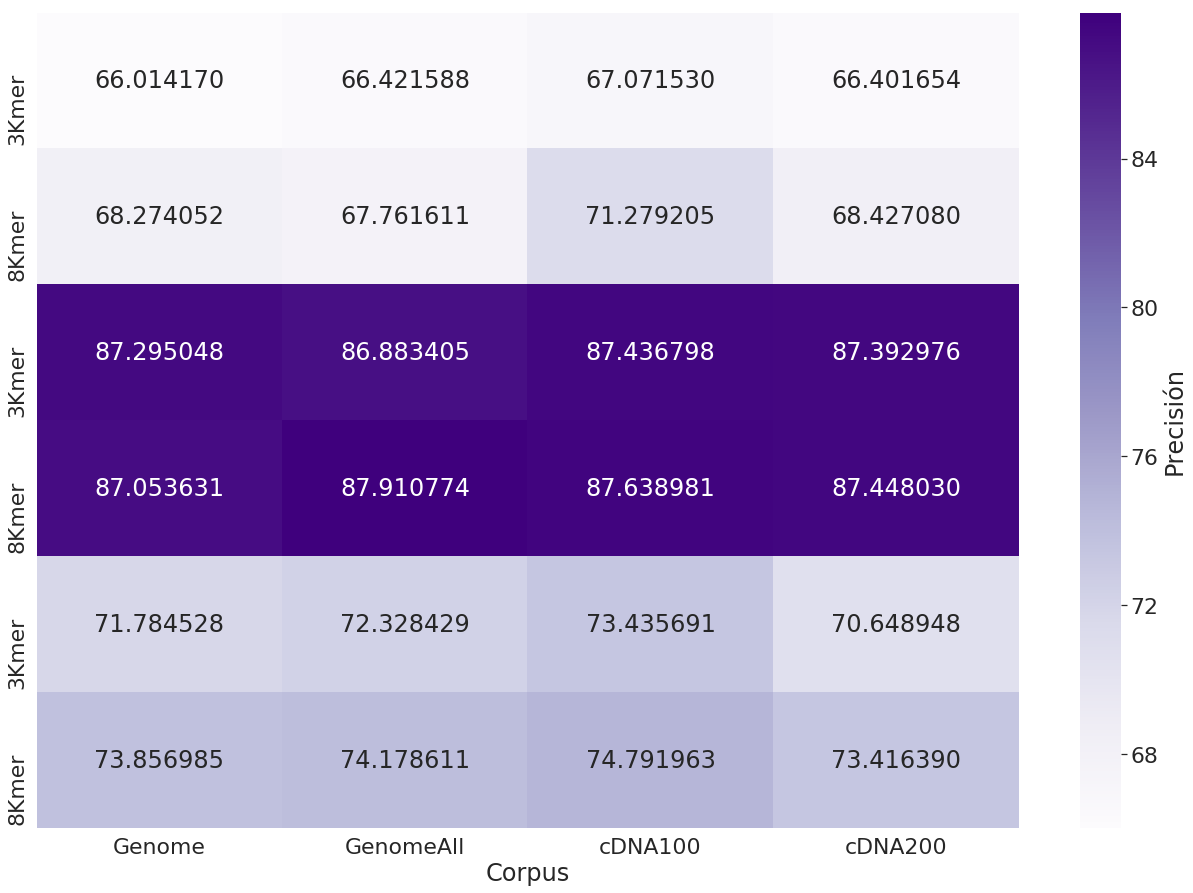

In [34]:
sns.set(font_scale=2)
plt.subplots(figsize=(22,15))
ax = sns.heatmap(matrix_models_mean*100,annot=True,fmt="f", cmap="Purples",square=False,xticklabels = ["Genome","GenomeAll","cDNA100","cDNA200"],yticklabels=["3Kmer","8Kmer","3Kmer","8Kmer","3Kmer","8Kmer"],cbar_kws={'label': 'Precisión'})
ax.set(xlabel='Corpus')
fig = ax.get_figure()
fig.savefig("flat_precision.png")

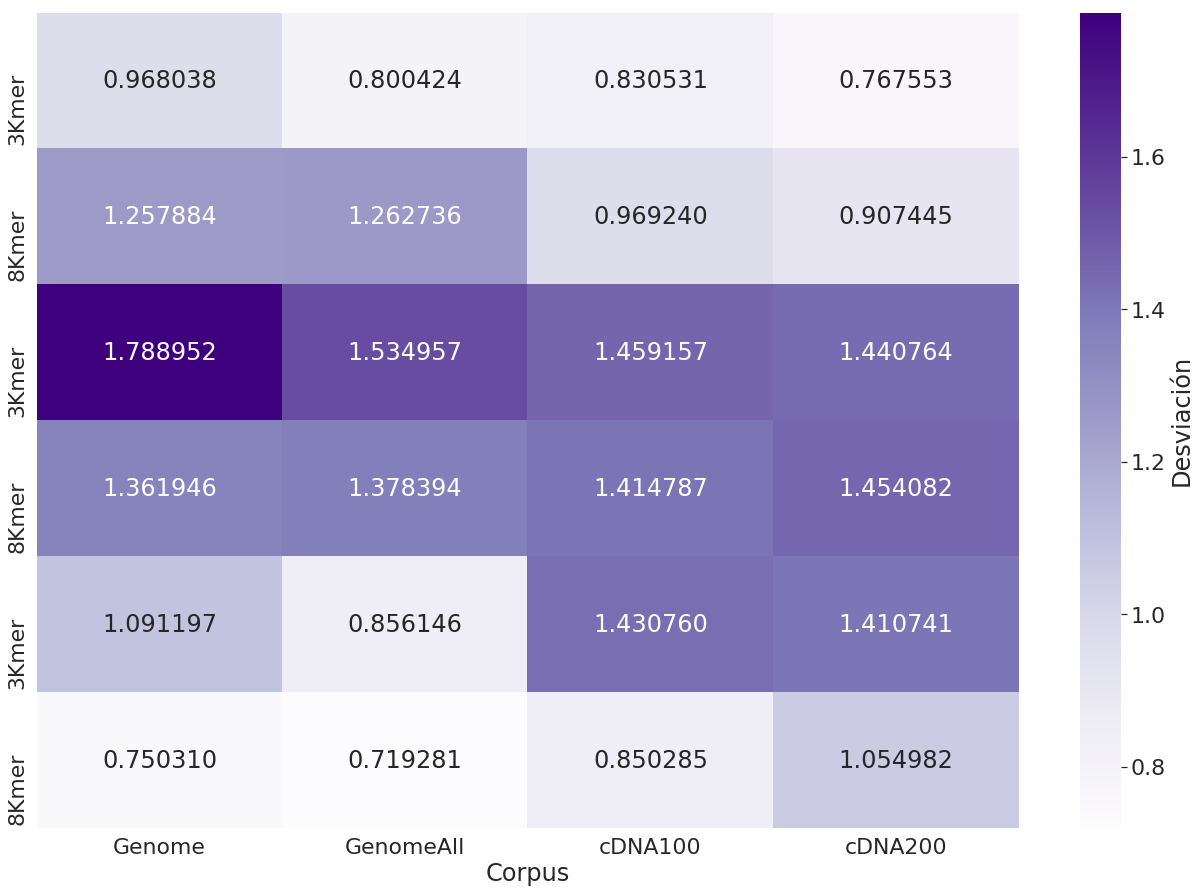

In [35]:
sns.set(font_scale=2)
plt.subplots(figsize=(22,15))
ax = sns.heatmap(matrix_models_std*100,annot=True,fmt="f", cmap="Purples",square=False,xticklabels = ["Genome","GenomeAll","cDNA100","cDNA200"],yticklabels=["3Kmer","8Kmer","3Kmer","8Kmer","3Kmer","8Kmer"],cbar_kws={'label': 'Desviación'})
ax.set(xlabel='Corpus')
fig = ax.get_figure()
fig.savefig("flat_std.png")

In [19]:
matrix_models_level_mean = np.ndarray(shape=(2,4))
matrix_models_level_std = np.ndarray(shape=(2,4))
i = 0
for kmer in kmers:
    j = 0
    for emb_type in emb_types:       
        log = get_log(generate_log_name("Level","complete",kmer,emb_type))        
        matrix_models_level_mean[i,j] = np.mean(log["val_main_acc"][-int(len(log["val_main_acc"])*0.2):])      
        matrix_models_level_std[i,j] = np.std(log["val_main_acc"][-int(len(log["val_main_acc"])*0.2):])                        
        j +=1        
    i +=1
matrix_models_level_mean

array([[0.91498203, 0.91745813, 0.91692657, 0.92003526],
       [0.91859313, 0.91892264, 0.92244084, 0.91967794]])

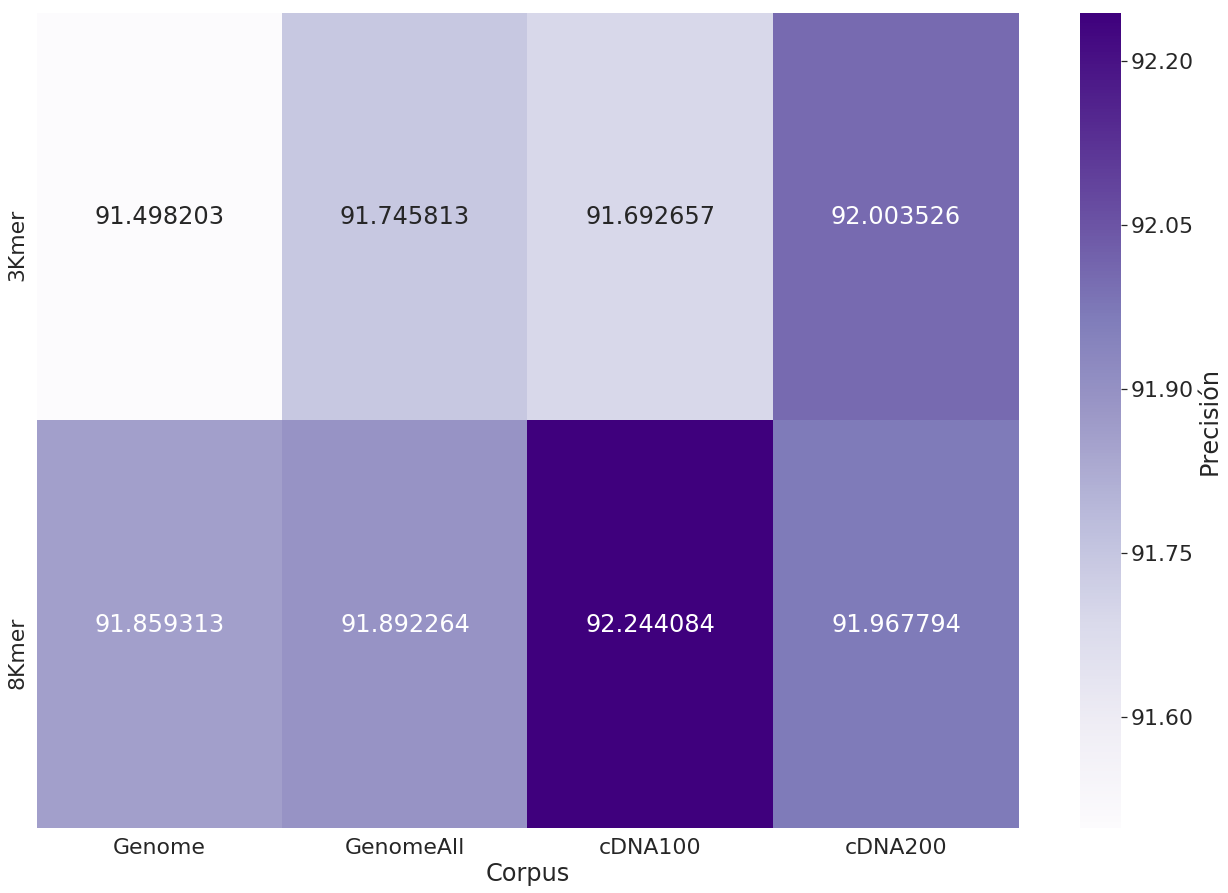

In [36]:
sns.set(font_scale=2)
plt.subplots(figsize=(22,15))
ax = sns.heatmap(matrix_models_level_mean*100,annot=True,fmt="f", cmap="Purples",square=False,xticklabels = ["Genome","GenomeAll","cDNA100","cDNA200"],yticklabels=["3Kmer","8Kmer"],cbar_kws={'label': 'Precisión'})
ax.set(xlabel='Corpus')
fig = ax.get_figure()
fig.savefig("level_precision.png")

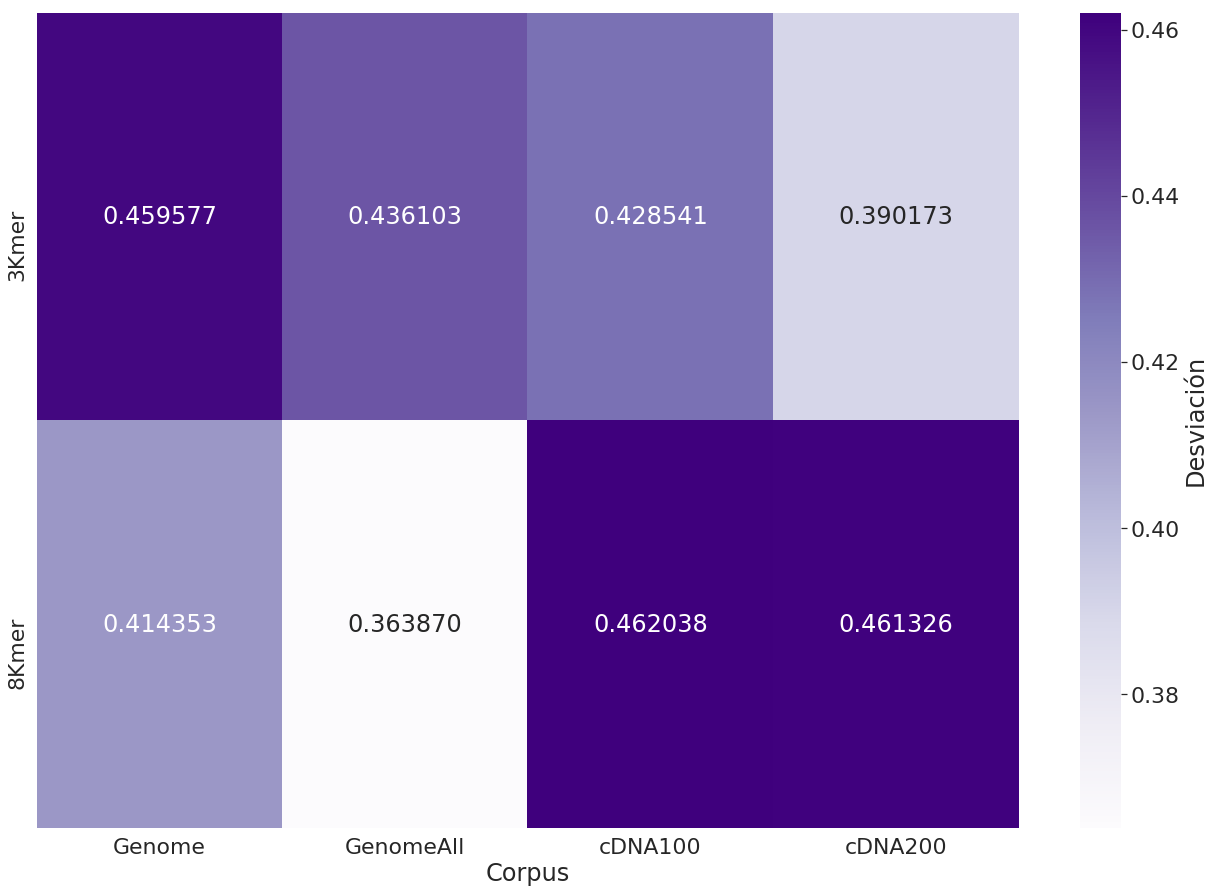

In [37]:
sns.set(font_scale=2)
plt.subplots(figsize=(22,15))
ax = sns.heatmap(matrix_models_level_std*100,annot=True,fmt="f", cmap="Purples",square=False,xticklabels = ["Genome","GenomeAll","cDNA100","cDNA200"],yticklabels=["3Kmer","8Kmer"],cbar_kws={'label': 'Desviación'})
ax.set(xlabel='Corpus')
fig = ax.get_figure()
fig.savefig("level_std.png")